# 01-Quantopian Forschungsgrundlagen (Research Basics)

**Bitte beachte, dass dieses Notebook nur auf Quantopian funktioniert! Erstelle einen Account und lade diese Notebookdatei hoch. Diese Kommandos und Funktionen werden außerhalb der Quantopian Handelsplattform nicht funktionieren!**

Beachte auch, dass eine Menge des Markdown-Textes in diesem Notebook direkt von der Quantopian Dokumentation und den Tutorials kommt. Schau Dir auch diese an, sie sind sehr gut!

## Forschung

Das Notebookformat erlaubt uns eine einfache Zusammenstellung von Informationen über verschiedene Wertpapiere. Denk daran, dass dies etwas anderes ist als die grundlegende Programmierplattform von Quantopian, die sich auf die eigentliche Implementierung und Rückvergleiche von Handelsstrategien konzentriert.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# DU MUSST KEINE MAGIC INLINE KOMMANDOS BEI QUANTOPIAN BENUTZEN!

## Informationen erfassen

Sehen wir uns ein paar der wichtigsten Funktionen an:

* get_pricing()
* symbols()
* local_csv()
* get_backtest()
* get_fundamentals()

## get_pricing()

Die `get_pricing` Funktion gewährt Zugang zu Preisdaten des US Equity aus 12 Jahren: dieselben Daten, die bei den Rückvergleichen bei Quantopian verwendet werden. 

`get_pricing` gibt ein <b>Objekt von Pandas</b> zurück. Dies kann ein Panel, ein Datenframe oder Reihen sein, je nachdem, was die Inputvariablen sind.

In [17]:
mcdon = get_pricing('MCD',
                    start_date='2017-01-01', 
                    end_date = '2017-02-01', 
                    frequency='minute')

In [18]:
mcdon.head()

open_price    high     low  close_price    volume  \
2017-01-03 14:31:00+00:00      121.86  121.86  121.57       121.63  123665.0   
2017-01-03 14:32:00+00:00      121.73  121.92  121.41       121.45   13536.0   
2017-01-03 14:33:00+00:00      121.45  121.79  121.45       121.52   17562.0   
2017-01-03 14:34:00+00:00      121.45  121.80  121.44       121.75   12072.0   
2017-01-03 14:35:00+00:00      121.74  122.00  121.66       121.99    8100.0   

                            price  
2017-01-03 14:31:00+00:00  121.63  
2017-01-03 14:32:00+00:00  121.45  
2017-01-03 14:33:00+00:00  121.52  
2017-01-03 14:34:00+00:00  121.75  
2017-01-03 14:35:00+00:00  121.99

In [19]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [33]:
# Kann zwar nur etwa 12 Jahre zurück gehen,
# was aber alles ist, was Du für Algorithmisches Handeln benötigst; 
# weiter zurück zu gehen bringt wahrscheinlich mehr Rauschen als Signal.

mcdon = get_pricing('MCD',
                    start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')

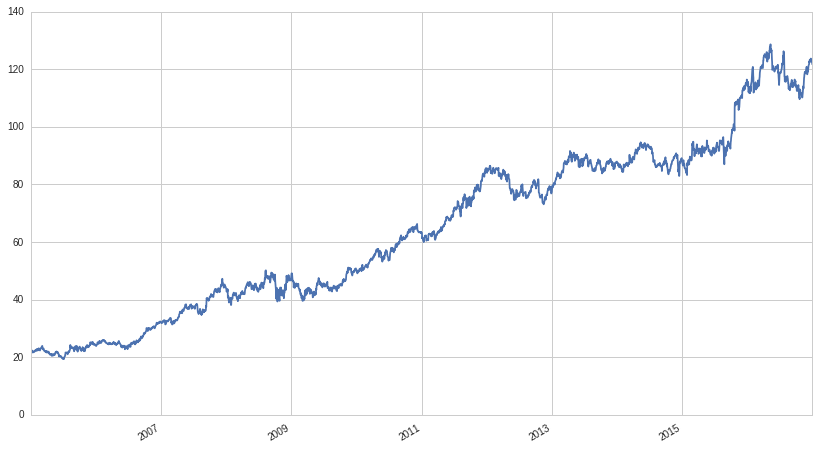

In [34]:
mcdon['close_price'].plot()

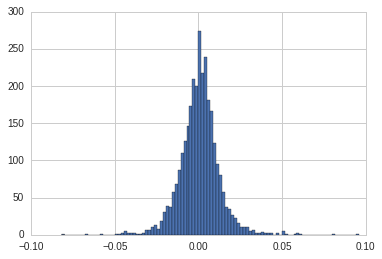

In [35]:
mcdon['close_price'].pct_change(1).hist(bins=100,figsize=(6,4))

## symbols()

Im Default gibt `symbols` das Wertpapierobjekt für ein Börsenschreibersymbol (ticker symbol) zurück. Gib ein Symbol oder eine Liste von Symbolen als String an und Du bekommst eine Liste der Wertpapiertobjekte zurück. 

- Verwende `symbol_reference_date`, um herauszufinden, für welches Datum du das Symbol für ein bestimmtes Ticker Symbol zurück haben willst.
- Gib mit `handle_missing` an, wie mit fehlenden Ergebnissen umgegangen werden soll.


In [39]:
mcdon_eq_info = symbols('MCD')

In [41]:
type(mcdon_eq_info)

<type 'zipline.assets._assets.Equity'>

In [48]:
for key in mcdon_eq_info.to_dict():
    print(key)
    print(mcdon_eq_info.to_dict()[key])
    print('\n')

end_date
2017-07-19 00:00:00+00:00


exchange
NYSE


auto_close_date
2017-07-24 00:00:00+00:00


symbol
MCD


first_traded
None


asset_name
MCDONALDS CORP


exchange_full
NEW YORK STOCK EXCHANGE


sid
4707


start_date
2002-01-01 00:00:00+00:00




## get_fundamentals()

Die Funktion `get_fundamentals` bietet programmatischen Zugang zur grundlegenden Quantopian Datenbank. Basierend auf Daten von Morningstar, bietet `get_fundamentals` über 600 Firmenmetriken ab 2002 (um den Preisdaten von Quantopian zu entsprechen).

Die in dieser Funktion verwendeten Daten sind dieselben, die von der Funktion `get_fundamentals` in der Quantopian IDE verwendet werden. Die Felder werden in den Hilfsdokumenten von Quantopian beschrieben: http://www.quantopian.com/help/fundamentals.


In [49]:
# Im Notebook musst Du zuerst Folgendes machen:
fundamentals = init_fundamentals()

Die Funktion get_fundamentals() verarbeitet eine SQLAlchemy Anfrage, die relativ kompliziert ist und auf den ersten Blick merkwürdig aussehen kann. Im Prinzip kannst Du damit nach einer Reihe von Grundbegriffen filtern (so etwas wie Börsenwert, Kurs-Gewinn-Verhältnis (P/E Ratio) oder sogar Sitz des Hauptquartiers). Sieh Dir den Link oben an, um alle Filter zu sehen, die Du verwenden kannst!

Besprechen wir kurz ein paar Beispielanfragen.

Zuerst solltest Du fundamentals aufrufen und die Tab-Taste benutzen, um die verschiedenen Optionen zu sehen:

In [55]:
fundamentals. # hier Tab drücken wie im Video!

SyntaxError: invalid syntax (<ipython-input-55-bbf6938c8013>, line 1)

In [57]:
# Börsenwert
my_query = query(fundamentals.valuation.market_cap)

In [59]:
my_funds = get_fundamentals(my_query,'2017-01-01')

In [62]:
my_funds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, market_cap to market_cap
Columns: 5551 entries, Equity(21 [AAME]) to Equity(50554 [HEBT])
dtypes: float64(5551)
memory usage: 43.4+ KB


In [64]:
# Gibt im Prinzip nur den Börsenwert für alles zurück
# für den 01.01.2017
my_funds.head()

Equity(21 [AAME])  Equity(24 [AAPL])  Equity(25 [ARNC_PR])  \
market_cap         80256300.0       6.224410e+11                   NaN   

            Equity(31 [ABAX])  Equity(39 [DDC])  Equity(41 [ARCB])  \
market_cap       1.190750e+09       808964000.0        722555000.0   

            Equity(52 [ABM])  Equity(53 [ABMD])  Equity(62 [ABT])  \
market_cap      2.265560e+09       4.927210e+09      5.640420e+10   

            Equity(64 [ABX])          ...           Equity(50533 [CNDT])  \
market_cap      1.910140e+10          ...                   3.029760e+09   

            Equity(50534 [HGV])  Equity(50535 [PK])  Equity(50537 [WRD])  \
market_cap         2.559150e+09        5.890500e+09         1.734880e+09   

            Equity(50539 [TIG])  Equity(50540 [TRVG])  \
market_cap         2.265930e+09          2.741480e+09   

            Equity(50541 [KEY_PRI])  Equity(50544 [KEG])  \
market_cap                      NaN           26639500.0   

            Equity(50547 [YTRA])  Equity(50554 [HEBT])  
market_cap           329764000.0            91800000.0  

[1 rows x 5551 columns]

In [74]:
# Normalerweise filterst du nach der Anfrage nach anderen Eigenschaften.

# Beachte nur Firmen, die mindestens 500 Milliarden wert sind (eine Menge Geld!)
big_companies = (query(fundamentals.valuation.market_cap).
                 filter(fundamentals.valuation.market_cap > 500000000000) )

In [75]:
my_big_funds = get_fundamentals(big_companies,'2017-07-19')

In [76]:
my_big_funds

Equity(24 [AAPL])  Equity(5061 [MSFT])  Equity(26578 [GOOG_L])  \
market_cap       7.824930e+11         5.659140e+11            6.752440e+11   

            Equity(46631 [GOOG])  
market_cap          6.752440e+11

In [70]:
7.82 * 10**11

782000000000.0

In [50]:
get_fundamentals()

TypeError: get_fundamentals() takes at least 2 arguments (0 given)